In [4]:
import pandas as pd
df= pd.read_csv("C:/Users/anugr/Downloads/supermarket_sales.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
#Checking Null Values
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
## Convert Date to datetime and extracting day and month from it also checking null values
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.to_period("M")
df["Day"] = df["Date"].dt.day_name()
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Month                      0
Day                        0
dtype: int64

In [7]:
import matplotlib.pyplot as plt

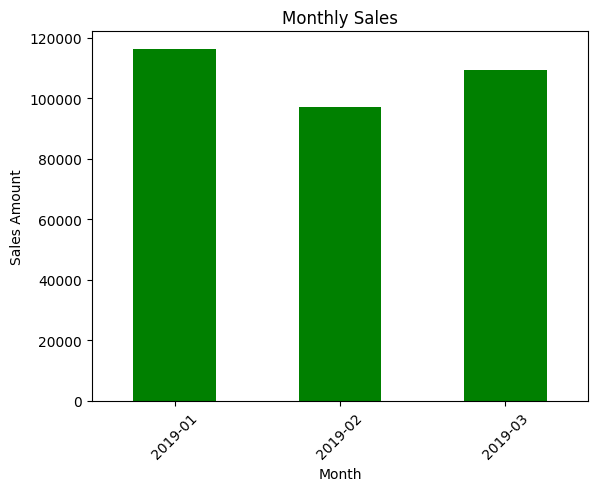

In [8]:
monthly_sales = df.groupby("Month")["Total"].sum()
monthly_sales.plot (kind="bar", title ="Monthly Sales" , color = "green")
plt.ylabel("Sales Amount")
plt.xticks(rotation = 45) 
plt.show()

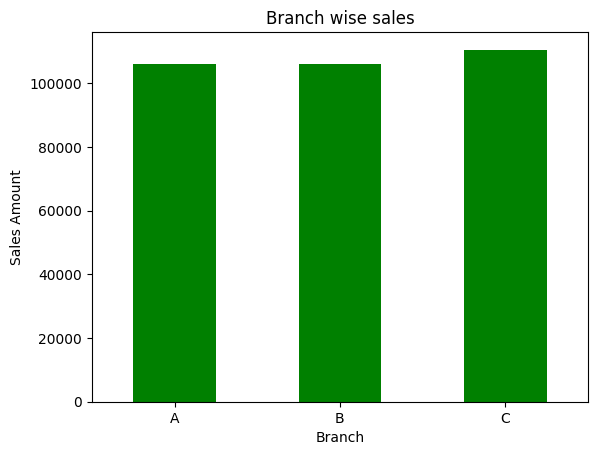

In [9]:
#Sales by Branch

Branch_sales = df.groupby("Branch")["Total"].sum()
Branch_sales.plot(kind = "bar" , title = "Branch wise sales", color = "Green")
plt.ylabel("Sales Amount")
plt.xticks(rotation = 0)
plt.show()

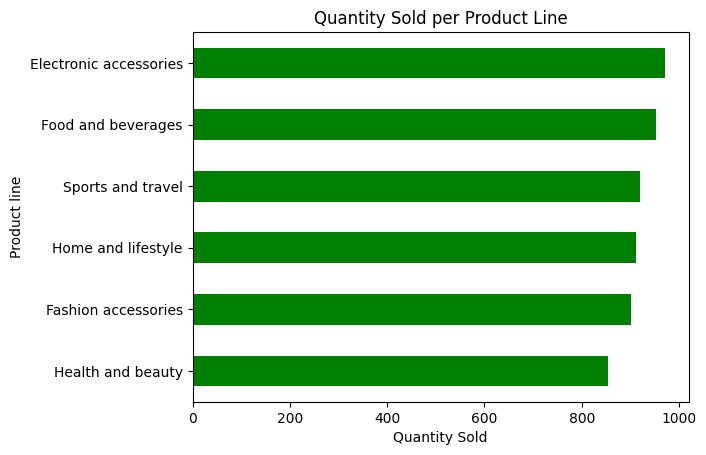

In [10]:
# Quantity sold by Product Line
product_sales = df.groupby("Product line")["Quantity"].sum().sort_values()
product_sales.plot(kind="barh", title="Quantity Sold per Product Line", color="green")
plt.xlabel("Quantity Sold")
plt.show()

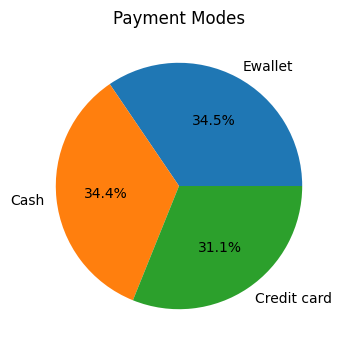

In [22]:
#Payment Method Count
df["Payment"].value_counts().plot(kind="pie", autopct = "%1.1f%%", title = "Payment Modes", figsize = (4,4))
plt.ylabel("")
plt.show()

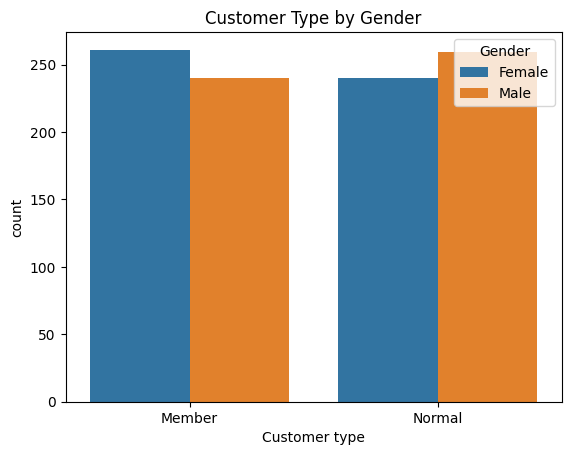

In [25]:
#Customer Type by Gender
import seaborn as sns
sns.countplot(x="Customer type", hue ="Gender" , data = df)
plt.title("Customer Type by Gender")
plt.show()

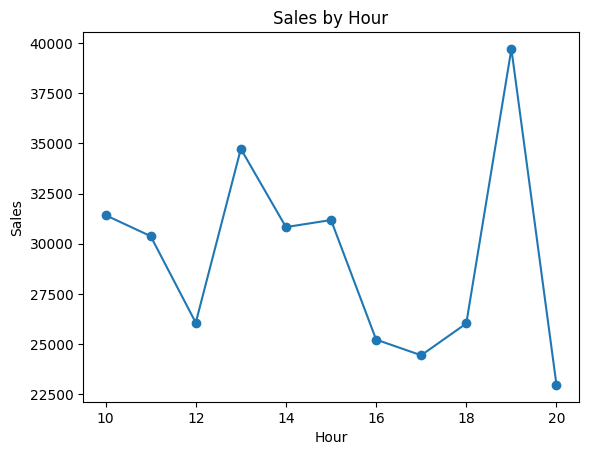

In [32]:
# Plot Sales by Hour

df["Hour"] = pd.to_datetime(df["Time"],  format="%H:%M").dt.hour
df.groupby("Hour")["Total"].sum().plot(kind="line", marker='o', title="Sales by Hour")
plt.ylabel("Sales")
plt.show()






In [33]:
#Exporting cleaned data
df.to_csv("cleaned_supermarket_sales.csv", index=False)